In [66]:
import os
import pyriemann
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from pathlib import Path
from scipy import stats
from sklearn.model_selection import cross_val_score
from scipy.fftpack import fft
from scipy import signal

### Import data

Run the first cell if you want to only look at individuals data\
and the second cell if you want a combined data set

In [67]:
#Individual subject and session
subject = "obj_felix"
session = "1"
data_dir = Path("../timeflux/data/")
path = data_dir / f"{subject}" / f"{session}"

X_data = np.empty((0,4,256)) # Placeholder for data
y_data = np.empty((0)) # Placeholder for data
print(list(path.glob("data_*.npz")))
for file in path.glob("data_*.npz"):
    with open(file, "rb") as npz:
        archive = np.load(npz, allow_pickle=True)
        X_data = np.concatenate((X_data, archive["X"]))
        y_data = np.concatenate((y_data, archive["y"]))

[WindowsPath('../timeflux/data/FnF_felix/1/data_23-05-2022-21-15-20.npz')]


In [174]:
#Combined test subjects and sessions
subject = ("obj_edvin","")
#subject = ("obj_felix","a")
session = ("1","2","3")
data_dir = Path("../timeflux/data/")
paths = np.array([[data_dir / f"{subj}" / f"{sesh}" for sesh in session] for subj in subject]).flatten()

X_data = np.empty((0,4,256)) # Placeholder for data
y_data = np.empty((0)) # Placeholder for data
for path in paths:
    for file in path.glob("data_*.npz"):
        with open(file, "rb") as npz:
            archive = np.load(npz, allow_pickle=True)
            X_data = np.concatenate((X_data, archive["X"]))
            y_data = np.concatenate((y_data, archive["y"]))

In [175]:
sens_dict = {0: 'TP9',
             1: 'AF7',
             2: 'AF8',
             3: 'TP10'}

#Convert the y_data to binary 0-non-familiar and 1-familiar
if False:
    y_data[y_data == 'familiar'] = 1
    y_data[y_data == 'non-familiar'] = 0
else:
    y_data[y_data == 'face'] = 1
    y_data[y_data == 'object'] = 0
    
Y_data = y_data.astype(int)
    
print(X_data.shape)
print(Y_data.shape)

(150, 4, 256)
(150,)


## Visualizations

First plot shows the mean value for each sensor of Muse S
Shows good results with a strong difference in response almost immediately after the event
in the temporal locations and little information gain at the alt-frontal locations.

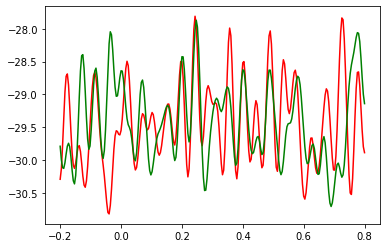

In [176]:
def mean(data): return np.mean(data)
def std(data): return np.std(data)

familiarData = X_data[Y_data == 1]
nonFamiliarData = X_data[Y_data == 0]
meanArr_F = np.apply_along_axis(mean, axis=0, arr=familiarData)
meanArr_nF = np.apply_along_axis(mean, axis=0, arr=nonFamiliarData)

timeTicks = np.linspace(-0.2,0.8,256)
#plt.plot(timeTicks, nonFamiliarData[14,0], color='r')
#plt.plot(timeTicks, familiarData[24,0], color='g')
plt.plot(timeTicks, meanArr_nF[1], color='r')
plt.plot(timeTicks, meanArr_F[1], color='g')
plt.show()



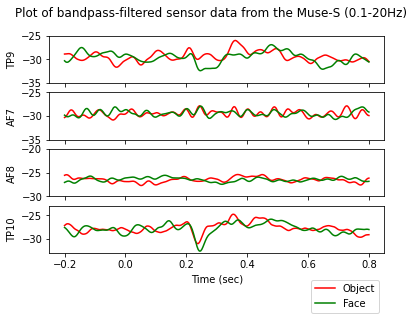

In [179]:
f, (ax_TP9,ax_AF7,ax_AF8,ax_TP10) = plt.subplots(4, sharex=True)

ax_TP9.plot(timeTicks, meanArr_nF[0], color='r')
ax_TP9.plot(timeTicks, meanArr_F[0], color='g')
ax_AF7.plot(timeTicks, meanArr_nF[1], color='r')
ax_AF7.plot(timeTicks, meanArr_F[1], color='g')
ax_AF8.plot(timeTicks, meanArr_nF[2], color='r')
ax_AF8.plot(timeTicks, meanArr_F[2], color='g')
ax_TP10.plot(timeTicks, meanArr_nF[3], color='r')
ax_TP10.plot(timeTicks, meanArr_F[3], color='g')

ax_TP9.set_ylabel('TP9')
ax_TP9.set_ylim([-35,-25])
ax_AF7.set_ylabel('AF7')
ax_AF7.set_ylim([-35,-25])
ax_AF8.set_ylabel('AF8')
ax_AF8.set_ylim([-30,-20])
ax_TP10.set_ylabel('TP10')
ax_TP10.set_ylim([-33,-23])
ax_TP10.set_xlabel('Time (sec)')

f.legend(('Object','Face'), bbox_to_anchor=(0.9,0.05))
f.suptitle('Plot of bandpass-filtered sensor data from the Muse-S (0.1-20Hz)', horizontalalignment='center')
plt.show()